In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import os
from PIL import Image
from keras.utils import np_utils
from scipy import misc

Using TensorFlow backend.


In [3]:
path = 'dataset/train/Train/'

In [4]:
images = os.listdir(path)

In [5]:
images[0]

'9538.jpg'

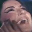

In [6]:
Image.open('dataset/train/Train/'+images[3]).resize((32,32))

In [7]:
train_labels = pd.read_csv('dataset/train/train.csv')

In [8]:
train_labels.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [9]:
# outputs = list((train_labels['Class']).unique())

In [10]:
# (train_labels[train_labels['ID']==images[0]]['Class'])

In [11]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]

In [12]:
class data_Label_Combiner:

    def Data_combiner(self,images, labels, path):
        for each in images:
            x_train.append(np.asarray(Image.open(path+each).resize((64,64)), dtype='int32'))
#             y_train.append(np.asarray(binarizer.transform(labels[labels['ID']==each]['Class']),dtype='float32'))
            y_train.append(np.asarray(labels[labels['ID']==each]['Class']))
        return x_train, y_train


In [13]:
dlc = data_Label_Combiner()

In [14]:
x_train, y_train = dlc.Data_combiner(images,train_labels,path)

In [15]:
y_train= np.array(y_train)

In [16]:
le = LabelEncoder()

In [17]:
le.fit(y_train)

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [18]:
y_train = le.transform(y_train)

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
y_train = np_utils.to_categorical(y_train)

In [20]:
x_train=np.array(x_train)

In [21]:
x_train, x_cross_val, y_train, y_cross_val = train_test_split(x_train,y_train, test_size = 0.1)

In [22]:
clasifier = Sequential()

In [23]:
clasifier.add(Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
clasifier.add(MaxPooling2D(pool_size=(2,2)))
clasifier.add(Convolution2D(32,3,3, activation='relu'))
clasifier.add(MaxPooling2D(pool_size=(2,2)))
clasifier.add(Flatten())

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


Instructions for updating:
Colocations handled automatically by placer.


/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
clasifier.add(Dense(activation='relu', output_dim = 128))
clasifier.add(Dense(activation='relu', output_dim = 128))
clasifier.add(Dense(output_dim = 3, activation='softmax'))


/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
clasifier.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='adam' )

In [26]:
# train_generator = ImageDataGenerator(rotation_range=0.2,zoom_range=0.3, shear_range=0.3, vertical_flip=True, rescale=1.0/255)

train_generator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    zoom_range=0.3,
    shear_range=0.3,
    rescale=1.0/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

val_generator = ImageDataGenerator(rescale=1.0/255)

In [27]:
train_generator.fit(x_train)
val_generator.fit(x_cross_val)

In [28]:
x = np.array([train_generator.apply_transform(sample,transform_parameters={'theta':30,'tx':0.2,'ty':0.3,'shear':0.6}) for sample in x_train])

In [29]:
type(x)

numpy.ndarray

In [2]:
x_c = val_generator

NameError: name 'val_generator' is not defined

In [ ]:
# for i,j in train_generator.flow(x_train,y_train):
#     print (i,j,'\n\n')
# np.array(x_train).shape, np.array(y_train).shape

In [1]:
for e in range(10):
#     print('Epoch', e)
    batches = 0
    for x_batch, y_batch in train_generator.flow(x, y_train, batch_size=32):
        clasifier.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(x_train) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

NameError: name 'train_generator' is not defined

In [ ]:
clasifier.fit(x,y_train,steps_per_epoch=len(x_train), epochs=10)

Epoch 1/10


In [ ]:
clasifier.fit(x_train,y_train,steps_per_epoch=len(x_train) ,epochs=10,verbose=1,validation_data=(x_cross_val,y_cross_val),validation_steps=len(x_cross_val))

Train on 17915 samples, validate on 1991 samples
Epoch 1/10


In [1]:
y_train[0]

NameError: name 'y_train' is not defined

In [ ]:
np_utils.to_categorical(outputs,3)

In [ ]:
le = LabelEncoder()
le.fit(outputs)

In [ ]:
le.transform(outputs)

In [ ]:
outputs

In [ ]:
np_utils.to_categorical(le.transform(outputs),3).shape

In [ ]:
(np.array(LabelBinarizer().fit_transform(outputs),dtype='float32')).shape

In [ ]:
a = np.array(np.array([[1,2,3]]))

In [ ]:
b = np.array([[1,2,3]])
c =  np.array([9,10,11])

In [ ]:
a = np.append(a,b)

In [ ]:
a

In [ ]:
e = np.hstack(b)

In [ ]:
d=np.append(c,a,axis=0)

In [ ]:
d = np.append(a,b,axis=0)

In [ ]:
d